In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pool A 
url_2011_pool_a = 'https://en.wikipedia.org/wiki/2011_Rugby_World_Cup_Pool_A'
response_2011_pool_a = requests.get(url_2011_pool_a)
soup_2011_pool_a = BeautifulSoup(response_2011_pool_a.text,'html.parser')
div_2011_pool_a = soup_2011_pool_a.find('div', {'id':'mw-content-text'})
summary_2011_pool_a = div_2011_pool_a.find_all('div',{'class':'vevent summary'})
events_2011_pool_a = []
for i in summary_2011_pool_a:
    text = i.text
    events_2011_pool_a.append(text)

In [3]:
#pool B
url_2011_pool_b = 'https://en.wikipedia.org/wiki/2011_Rugby_World_Cup_Pool_B'
response_2011_pool_b = requests.get(url_2011_pool_b)
soup_2011_pool_b = BeautifulSoup(response_2011_pool_b.text,'html.parser')
div_2011_pool_b = soup_2011_pool_b.find('div', {'id':'mw-content-text'})
summary_2011_pool_b = div_2011_pool_b.find_all('div',{'class':'vevent summary'})
events_2011_pool_b = []
for i in summary_2011_pool_b:
    text = i.text
    events_2011_pool_b.append(text)

In [4]:
#pool C
url_2011_pool_c = 'https://en.wikipedia.org/wiki/2011_Rugby_World_Cup_Pool_C'
response_2011_pool_c = requests.get(url_2011_pool_c)
soup_2011_pool_c = BeautifulSoup(response_2011_pool_c.text,'html.parser')
div_2011_pool_c = soup_2011_pool_c.find('div', {'id':'mw-content-text'})
summary_2011_pool_c = div_2011_pool_c.find_all('div',{'class':'vevent summary'})
events_2011_pool_c = []
for i in summary_2011_pool_c:
    text = i.text
    events_2011_pool_c.append(text)

In [5]:
#pool D
url_2011_pool_d = 'https://en.wikipedia.org/wiki/2011_Rugby_World_Cup_Pool_D'
response_2011_pool_d = requests.get(url_2011_pool_d)
soup_2011_pool_d = BeautifulSoup(response_2011_pool_d.text,'html.parser')
div_2011_pool_d = soup_2011_pool_d.find('div', {'id':'mw-content-text'})
summary_2011_pool_d = div_2011_pool_d.find_all('div',{'class':'vevent summary'})
events_2011_pool_d = []
for i in summary_2011_pool_d:
    text = i.text
    events_2011_pool_d.append(text)

In [6]:
#knockout stage
url_2011_knockout = 'https://en.wikipedia.org/wiki/2011_Rugby_World_Cup_knockout_stage'
response_2011_knockout = requests.get(url_2011_knockout)
soup_2011_knockout = BeautifulSoup(response_2011_knockout.text,'html.parser')
div_2011_knockout = soup_2011_knockout.find('div', {'id':'mw-content-text'})
summary_2011_knockout = div_2011_knockout.find_all('div',{'class':'vevent summary'})
events_2011_knockout = []
for i in summary_2011_knockout:
    text = i.text
    events_2011_knockout.append(text)

In [7]:
events_2011 = events_2011_pool_a + events_2011_pool_b + events_2011_pool_c + events_2011_pool_d + events_2011_knockout

In [8]:
events_clean_2011 = [e.replace('\n',' ').replace('\xa0', ' ').strip() for e in events_2011]
data_2011 = " ".join(events_clean_2011)

In [9]:
data_2011 = data_2011.replace('(a.e.t.)','')
data_2011 = data_2011.replace('-','–')

In [10]:
#datemethodregex
date_pattern = re.compile(r'\d{1,2}\s\w*\s2011')
dates = date_pattern.findall(data_2011)
date_list = []
for i in dates:
    date_list.append(i)

In [11]:
#time
time_pattern = re.compile(r'2011(\d{2}:\d{2})')
time = time_pattern.findall(data_2011)
time_list = []
for i in time:
    time_list.append(i)

In [12]:
#team1
team1_pattern = re.compile(r'\s{4,6}(\D*|\D*\s\D*)\s{2,3}\d{1,3}–')
team1 = team1_pattern.findall(data_2011)
team1_list = []
for i in team1:
    team1_list.append(i)

In [13]:
#team2
team2_pattern = re.compile(r'[–]\d*\s{3,4}(\w*|\w*\s\w*)\s{3,7}\D{3,6}')
team2 = team2_pattern.findall(data_2011)
team2_list = []
for i in team2:
    team2_list.append(i)

In [14]:
#score
score_pattern = re.compile(r'\s{3}\d*[–]\d*\s{3}')
scores = score_pattern.findall(data_2011)
scores_list = []
for i in scores:
    scores_list.append(i)

In [15]:
#points team 1
pt1_pattern = re.compile(r'\s{3}(\d*)[–]\d*\s{3}')
pt1 = pt1_pattern.findall(data_2011)
pt1_list = []
for i in pt1:
    pt1_list.append(i)
pt1_list = [ int(x) for x in pt1_list ]

In [16]:
#points team 2 
pt2_pattern = re.compile(r'\s{3}\d*[–](\d*)\s{3}')
pt2 = pt2_pattern.findall(data_2011)
pt2_list = []
for i in pt2:
    pt2_list.append(i)
pt2_list = [ int(x) for x in pt2_list ]

In [17]:
#total points
total_points_list =[]
for i,j in zip(pt1_list, pt2_list):
    k = i+j
    total_points_list.append(k)

In [18]:
#attendance
attendance_pattern = re.compile(r'Attendance:\s(\d*[,]\d*)')
attendance = attendance_pattern.findall(data_2011)
attendance_list = []
for i in attendance:
    attendance_list.append(i)
attendance_list = [ x.replace(',','') for x in attendance_list]
attendance_list = [ int(x) for x in attendance_list]

In [19]:
#referee
referee_pattern = re.compile(r'Referee:\s(\w*\s\w*)')
referee = referee_pattern.findall(data_2011)
referee_list = []
for i in referee:
    referee_list.append(i)

In [20]:
#referee nationality
ref_nationality_pattern = re.compile(r'[(](\D*\s\D*|\D*)[)]')
ref_nationality = ref_nationality_pattern.findall(data_2011)
referee_nationality_list = []
for i in ref_nationality:
    referee_nationality_list.append(i)

In [21]:
dico_2011 = {'Match Date':date_list,'Kickoff Time':time_list, 'Home Team': team1_list, 'Away Team' : team2_list, 'Score': scores_list, 'Points Home Team': pt1_list, 'Points Away Team' : pt2_list, 'Total Points': total_points_list, 'Attendance': attendance_list, 'Referee': referee_list, 'Referee Nationality': referee_nationality_list}
df_2011 = pd.DataFrame.from_dict(dico_2011, orient='index')
df_2011 = df_2011.transpose()
df_2011['Match Date'] = pd.to_datetime(df_2011['Match Date'])
df_2011['Points Home Team'] = pd.to_numeric(df_2011['Points Home Team'])
df_2011['Points Away Team'] = pd.to_numeric(df_2011['Points Away Team'])
df_2011['Total Points'] = pd.to_numeric(df_2011['Total Points'])
df_2011['Attendance'] = pd.to_numeric(df_2011['Attendance'])
df_2011.info()
df_2011

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Match Date           48 non-null     datetime64[ns]
 1   Kickoff Time         48 non-null     object        
 2   Home Team            48 non-null     object        
 3   Away Team            48 non-null     object        
 4   Score                48 non-null     object        
 5   Points Home Team     48 non-null     int64         
 6   Points Away Team     48 non-null     int64         
 7   Total Points         48 non-null     int64         
 8   Attendance           48 non-null     int64         
 9   Referee              48 non-null     object        
 10  Referee Nationality  48 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 4.2+ KB


,Match Date,Kickoff Time,Home Team,Away Team,Score,Points Home Team,Points Away Team,Total Points,Attendance,Referee,Referee Nationality
0,2011-09-09,20:30,New Zealand,Tonga,41–10,41,10,51,60214,George Clancy,Ireland
1,2011-09-10,18:00,France,Japan,47–21,47,21,68,28569,Steve Walsh,Australia
2,2011-09-14,17:00,Tonga,Canada,20–25,20,25,45,17174,Jonathan Kaplan,South Africa
3,2011-09-16,20:00,New Zealand,Japan,83–7,83,7,90,30484,Nigel Owens,Wales
4,2011-09-18,20:30,France,Canada,46–19,46,19,65,14230,Craig Joubert,South Africa
5,2011-09-21,19:30,Tonga,Japan,31–18,31,18,49,17364,Dave Pearson,England
6,2011-09-24,20:30,New Zealand,France,37–17,37,17,54,60856,Alain Rolland,Ireland
7,2011-09-27,17:00,Canada,Japan,23–23,23,23,46,14335,Jonathan Kaplan,South Africa
8,2011-10-01,18:00,France,Tonga,14–19,14,19,33,32763,Steve Walsh,Australia
9,2011-10-02,15:30,New Zealand,Canada,79–15,79,15,94,37665,Romain Poite,France


<AxesSubplot:>

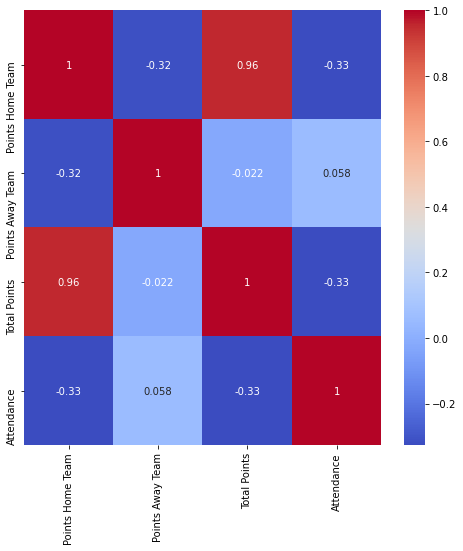

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df_2011.corr(),annot=True,cmap='coolwarm')

In [23]:
# df_2011.to_csv(r'C:\Users\lacar\DQ Projects\Rugby DataVis' + '\\2011.csv', index=False)